# News Headlines Sentiment

### NLP Homework

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports

import os
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime, timedelta
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import sys as sys

%matplotlib inline

In [2]:
# Read your api key environment variable

load_dotenv()

True

In [3]:
ls -a

./
../
.env
.ipynb_checkpoints/
FinTech Unit 12 NLP Homework Grading Rubric.pdf
Images/
NLP-Assignment.ipynb
README.md
Starter_Code/


In [4]:
api_k=os.getenv('news_api_key')

In [5]:
# Create a newsapi client

newsapi = NewsApiClient(api_key=api_k)

In [6]:
current_date = pd.Timestamp("2020-09-23", tz="America/New_York").isoformat()
past_date = pd.Timestamp("2020-08-24", tz="America/New_York").isoformat()
timeframe = "1D"

In [7]:
# Fetch the Bitcoin news articles

all_articles_btc = newsapi.get_everything(q='bitcoin',language='en')

In [8]:
all_articles_btc["totalResults"]

3358

In [9]:
# Fetch the Ethereum news articles

all_articles_eth = newsapi.get_everything(q='ethereum', language='en')

In [10]:
all_articles_eth["totalResults"]

1331

In [11]:
# Create the Bitcoin sentiment scores DataFrame

btc_sentiments = []

for article in all_articles_btc["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "positive", "neutral", "text"]
btc_df = btc_df[cols]

btc_df.head()

,compound,negative,positive,neutral,text
0,-0.6908,0.160,0.000,0.840,Two alleged crypto traders in Singapore appare...
1,0.2500,0.000,0.065,0.935,Image copyrightChandler GuoImage caption\r\n C...
2,-0.5267,0.128,0.000,0.872,A US district judge has sentenced a UK Nationa...
3,0.0000,0.000,0.000,1.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
4,0.0000,0.000,0.000,1.000,"July 15 was, at first, just another day for Pa..."


In [12]:
# Create the ethereum sentiment scores DataFrame

eth_sentiments = []

for article in all_articles_eth["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "positive", "neutral", "text"]
eth_df = eth_df[cols]

eth_df.head()

,compound,negative,positive,neutral,text
0,0.7506,0.0,0.209,0.791,If you've interacted with cryptocurrencies in ...
1,0.0000,0.0,0.000,1.000,TL;DR: The Complete Stock and Cryptocurrency I...
2,0.0000,0.0,0.000,1.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
3,0.5267,0.0,0.128,0.872,Bitcoin is the monetary base of the Internet. ...
4,0.4019,0.0,0.076,0.924,TLDR: With the training in the Interactive Lea...


In [13]:
# Describe the Bitcoin Sentiment

btc_df.describe()

,compound,negative,positive,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.281175,0.014400,0.061750,0.923850
std,0.368322,0.044625,0.041842,0.043245
min,-0.690800,0.000000,0.000000,0.840000
25%,0.000000,0.000000,0.000000,0.910000
50%,0.507000,0.000000,0.090000,0.910000
75%,0.507000,0.000000,0.090000,0.916250
max,0.507000,0.160000,0.090000,1.000000


In [14]:
# Describe the Ethereum Sentiment

eth_df.describe()

,compound,negative,positive,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.214183,0.023722,0.073611,0.902667
std,0.338255,0.046386,0.071283,0.085049
min,-0.659700,0.000000,0.000000,0.747000
25%,0.000000,0.000000,0.000000,0.838750
50%,0.226300,0.000000,0.073000,0.900000
75%,0.480725,0.032250,0.123500,1.000000
max,0.750600,0.162000,0.209000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Expand the default stopwords list if necessary

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
# Complete the tokenizer function

lemmatizer = WordNetLemmatizer()
btc_txt = btc_df['text']

def btc_tokenizer(btc_txt):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', btc_txt)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output

In [18]:
# Create a new tokens column for bitcoin

btc_tkn = btc_txt.apply(btc_tokenizer)
btc_df['tokens'] = btc_tkn
btc_df.head()

,compound,negative,positive,neutral,text,tokens
0,-0.6908,0.160,0.000,0.840,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, trader, singapore, appa..."
1,0.2500,0.000,0.065,0.935,Image copyrightChandler GuoImage caption\r\n C...,"[image, copyrightchandler, guoimage, caption, ..."
2,-0.5267,0.128,0.000,0.872,A US district judge has sentenced a UK Nationa...,"[us, district, judge, ha, sentenced, uk, natio..."
3,0.0000,0.000,0.000,1.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, tom, wilson, monthly, cry..."
4,0.0000,0.000,0.000,1.000,"July 15 was, at first, just another day for Pa...","[july, wa, first, another, day, parag, agrawal..."


In [19]:
# Create a new tokens column for ethereum

lemmatizer = WordNetLemmatizer()
eth_txt = eth_df['text']

def eth_tokenizer(eth_txt):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', eth_txt)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output

In [20]:
eth_tkn = eth_txt.apply(eth_tokenizer)
eth_df['tokens'] = eth_tkn
eth_df.head()

,compound,negative,positive,neutral,text,tokens
0,0.7506,0.0,0.209,0.791,If you've interacted with cryptocurrencies in ...,"[youve, interacted, cryptocurrencies, past, co..."
1,0.0000,0.0,0.000,1.000,TL;DR: The Complete Stock and Cryptocurrency I...,"[tldr, complete, stock, cryptocurrency, invest..."
2,0.0000,0.0,0.000,1.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, min, readopinions, expressed, entr..."
3,0.5267,0.0,0.128,0.872,Bitcoin is the monetary base of the Internet. ...,"[bitcoin, monetary, base, internet, unlike, na..."
4,0.4019,0.0,0.076,0.924,TLDR: With the training in the Interactive Lea...,"[tldr, training, interactive, learn, code, bun..."


# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [22]:
# Generate the Bitcoin N-grams where N=2

processed = btc_tokenizer(btc_df["text"].str.cat())
word_counts_btc = Counter(processed)
bigram_counts_btc = Counter(ngrams(processed, n=2))
bigram_counts_btc

Counter({('two', 'alleged'): 1,
         ('alleged', 'crypto'): 1,
         ('crypto', 'trader'): 1,
         ('trader', 'singapore'): 1,
         ('singapore', 'apparently'): 1,
         ('apparently', 'came'): 1,
         ('came', 'foolproof'): 1,
         ('foolproof', 'plan'): 1,
         ('plan', 'rather'): 1,
         ('rather', 'convert'): 1,
         ('convert', 'customer'): 1,
         ('customer', 'singapore'): 1,
         ('singapore', 'dollar'): 1,
         ('dollar', 'bitcoin'): 1,
         ('bitcoin', 'would'): 1,
         ('would', 'simply'): 1,
         ('simply', 'rob'): 1,
         ('rob', 'victim'): 1,
         ('victim', 'came'): 1,
         ('came', 'charsimage'): 1,
         ('charsimage', 'copyrightchandler'): 1,
         ('copyrightchandler', 'guoimage'): 1,
         ('guoimage', 'caption'): 1,
         ('caption', 'chandler'): 1,
         ('chandler', 'guo'): 1,
         ('guo', 'one'): 1,
         ('one', 'cryptocurrency'): 1,
         ('cryptocurrency', 'mine

In [23]:
# Generate the Ethereum N-grams where N=2

processed = eth_tokenizer(eth_df["text"].str.cat())
word_counts_eth = Counter(processed)
bigram_counts_eth = Counter(ngrams(processed, n=2))
bigram_counts_eth

Counter({('youve', 'interacted'): 1,
         ('interacted', 'cryptocurrencies'): 1,
         ('cryptocurrencies', 'past'): 1,
         ('past', 'couple'): 1,
         ('couple', 'year'): 1,
         ('year', 'good'): 1,
         ('good', 'chance'): 1,
         ('chance', 'youve'): 1,
         ('youve', 'used'): 1,
         ('used', 'metamask'): 1,
         ('metamask', 'cryptocurrency'): 1,
         ('cryptocurrency', 'wallet'): 1,
         ('wallet', 'form'): 1,
         ('form', 'browser'): 1,
         ('browser', 'extension'): 1,
         ('extension', 'support'): 1,
         ('support', 'ether'): 1,
         ('ether', 'charstldr'): 1,
         ('charstldr', 'complete'): 1,
         ('complete', 'stock'): 1,
         ('stock', 'cryptocurrency'): 1,
         ('cryptocurrency', 'investment'): 1,
         ('investment', 'toolkit'): 1,
         ('toolkit', 'bundle'): 1,
         ('bundle', 'sale'): 1,
         ('sale', 'sept'): 1,
         ('sept', 'saving'): 1,
         ('saving', 'li

# Use the token_count function to generate the top 10 words from each coin

In [24]:
# Get the top 10 words for Bitcoin

bigram_counts_btc.most_common(10)

[(('satoshi', 'nakaboto'), 26),
 (('charsour', 'robot'), 13),
 (('robot', 'colleague'), 13),
 (('colleague', 'satoshi'), 13),
 (('nakaboto', 'writes'), 13),
 (('writes', 'bitcoin'), 13),
 (('every', 'fucking'), 13),
 (('fucking', 'daywelcome'), 13),
 (('daywelcome', 'another'), 13),
 (('another', 'edition'), 13)]

In [25]:
# Get the top 10 words for Ethereum

bigram_counts_eth.most_common(10)

[(('one', 'cryptocurrency'), 2),
 (('fiat', 'backed'), 2),
 (('backed', 'stablecoins'), 2),
 (('satoshi', 'nakaboto'), 2),
 (('decentralized', 'exchange'), 2),
 (('photo', 'illustration'), 2),
 (('imageslightrocket', 'via'), 2),
 (('via', 'getty'), 2),
 (('price', 'bitcoin'), 2),
 (('youve', 'interacted'), 1)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [27]:
def wordcloud(text, title=""):
    cloud_df = WordCloud().generate(text)
    plt.imshow(cloud_df)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight": "bold"}
    plt.title(title, fontdict = fontdict)
    plt.show()

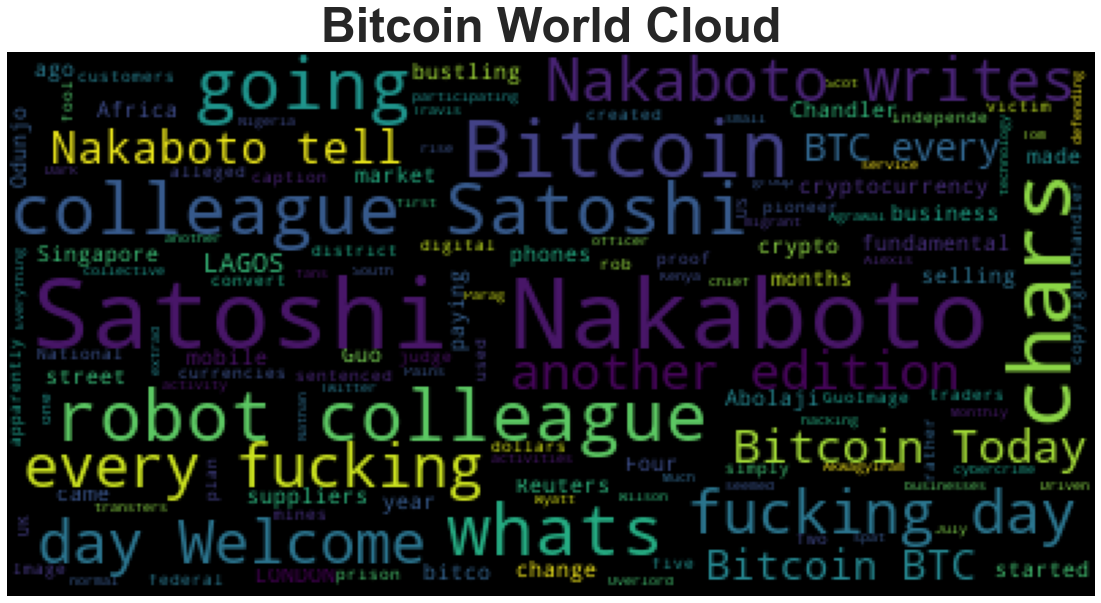

In [28]:
# Generate the Bitcoin word cloud
wordcloud(btc_df["text"].str.cat(), title="Bitcoin World Cloud")

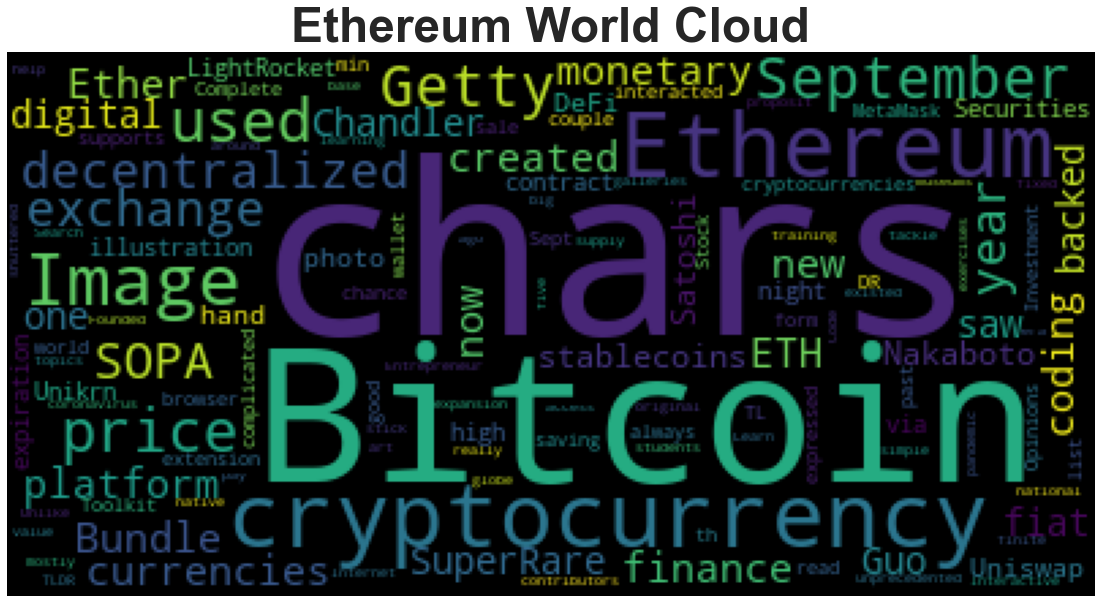

In [29]:
# Generate the Ethereum word cloud

wordcloud(eth_df["text"].str.cat(), title="Ethereum World Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [30]:
import spacy
from spacy import displacy

In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [41]:
# Concatenate all of the bitcoin text together
btc_text_concat = btc_df.text.str.cat()
btc_text_concat


'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]Image copyrightChandler GuoImage caption\r\n Chandler Guo at one of his cryptocurrency mines\r\nChandler Guo was a pioneer in cryptocurrency, the digital currencies that can be created and used independe… [+5995 chars]A US district judge has sentenced a UK National to five years in federal prison for participating in the cybercrime activities of hacking collective group “The Dark Overlord.” Nathan Wyatt was extrad… [+961 chars]By Alexis Akwagyiram, Tom Wilson\r\n* Monthly crypto transfers to and from Africa rise 55% in a year\r\n* Much of the activity in Nigeria, South Africa and Kenya\r\n* Driven by small businesses and migrant… [+7730 chars]July 15 was, at first, just another day for Parag Agrawal, the chief technology officer of Twitter. Everything seemed normal on the se

In [33]:
# Run the NER processor on all of the text
NER_proc_bit = nlp(btc_text_concat)

# Add a title to the document
NER_proc_bit.user_data["title"] = "Bitcoin NER"

In [34]:
# Render the visualization
displacy.render(NER_proc_bit, style ='ent', jupyter=True)

In [35]:
# List all Entities
for x in NER_proc_bit.ents:
    print(x.text, x.label_)

Two CARDINAL
Singapore GPE
365,000 Singapore dollars MONEY
bitcoin GPE
GuoImage ORG
Chandler Guo PERSON
one CARDINAL
Chandler Guo PERSON
US GPE
five years DATE
The Dark Overlord WORK_OF_ART
Nathan Wyatt PERSON
Alexis Akwagyiram PERSON
Tom Wilson PERSON
Monthly DATE
Africa LOC
55% PERCENT
a year DATE
Nigeria GPE
South Africa GPE
Kenya GPE
chars]July 15 DATE
first ORDINAL
Parag Agrawal ORG
Twitter ORG
Travis Scot PERSON
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi 

---

## Ethereum NER

In [40]:
# Concatenate all of the ethereum text together
eth_text_concat = eth_df.text.str.cat()
eth_text_concat

"If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.\r\nThe world of finance has always been complicated, and now th… [+2225 chars]September\r\n18, 2020\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nFounded over five years ago, the Ethereum platform and its native ether (ETH)\xa0have existed mostly in t… [+6239 chars]Bitcoin is the monetary base of the Internet. Unlike national currencies, new bitcoins are created by a fixed and finite supply.¹ In an era of unprecedented monetary expansion Bitcoins value proposit… [+6399 chars]TLDR: With the training in the Interactive Learn to Code Bundle, students tackle big coding topics through hands-on exercises to h

In [37]:
# Run the NER processor on all of the text
NER_proc_eth = nlp(eth_text_concat)

# Add a title to the document
NER_proc_eth.user_data["title"] = "Ethereum NER"

In [38]:
# Render the visualization
displacy.render(NER_proc_eth, style ='ent', jupyter=True)

In [39]:
# List all Entities for Ethereum
for x in NER_proc_eth.ents:
    print(x.text, x.label_)

the past couple of years DATE
The Complete Stock and Cryptocurrency Investment Toolkit Bundle ORG
29.46 MONEY
Sept. 7 DATE
97% PERCENT
18, 2020 DATE
6 min QUANTITY
five years ago DATE
Ethereum ORG
ETH ORG
an era DATE
Bitcoins ORG
SuperRare ORG
SuperRare ORG
GuoImage ORG
Chandler Guo PERSON
one CARDINAL
Chandler Guo PERSON
SEC ORG
OCC ORG
fiat ORG
yesterday DATE
fiat ORG
this year DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
chars]$100 million MONEY
Deloitte ORG
KPMG ORG
Fidelity ORG
$100 milli MONEY
Uniswap ORG
400 CARDINAL
UNI ORG
September 1 DATE
twenty dollars MONEY
May DATE
bitcoin GPE
DeFi LOC
DeFi LOC
Ethereum ORG
Mateusz Slodkowski/ PERSON
458,000 CARDINAL
September 25 DATE
Shaun Fernando PERSON
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
September 15, 2020 DATE
the night TIME
USD ORG
the night TIME
Unikrn ORG
Unikrn ORG
UnikoinGol